# A first look at the data

## Introduction

In this section we will set the paths and load the data. We will explain about the data structure and do a few sanity checks.

Import the required modules:

In [9]:
import os
import numpy as np
import mne

## Loading the data

Loading the data. The MEGIN data are stored in the FIF format which is a binary format with embedded labels.

As a first step set the path to the data. Note this will dependent on where you have stored the data set. After set the file name.

In [10]:
data_path = r'C:\Users\JensenO\Dropbox\FLUX\Development\FLUX\data'
# data_path = r'C:\Users\Ole\Dropbox\FLUX\Development\FLUX\data'
file_name = ['training_raw-1.fif','training_raw-2.fif']

Since there is a limit to the file size of the FIF files, they are broken into 5 sub-files.

Start by reading the first file:

In [11]:
path_data = os.path.join(data_path,file_name[0]) 

In [12]:

data1 = mne.io.read_raw_fif(path_data)

Opening raw data file C:\Users\JensenO\Dropbox\FLUX\Development\FLUX\data\training_raw-1.fif...


<ipython-input-12-68b653abda30>:1: RuntimeWarning: This filename (C:\Users\JensenO\Dropbox\FLUX\Development\FLUX\data\training_raw-1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data1 = mne.io.read_raw_fif(path_data)


    Read a total of 8 projection items:
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
        generated with autossp-1.2.0 (1 x 306)  idle
    Range : 208000 ... 1664999 =    208.000 ...  1664.999 secs
Ready.


To get some basic information from the FIF file write

In [13]:
print(data1)

<Raw | training_raw-1.fif, 343 x 1457000 (1457.0 s), ~5.4 MB, data not loaded>


The 5.4 MB refer to the size of the data set. The time 1457.0 s is recording time. As the sampling rate was 1000 Hz this results in 1457000 samples recorded in 343 channels. These channels include the MEG, EoG, triggers channels etc.

To get some additional information:

In [14]:
print(data1.info)

<Info | 23 non-empty values
 acq_pars: ACQactiveGround 1 ACQch.BIO001.gain 2000 ACQch.BIO001.highpass ...
 bads: []
 ch_names: EOG001, EOG002, ECG003, IASX+, IASX-, IASY+, IASY-, IASZ+, ...
 chs: 3 BIO, 11 IAS, 102 MAG, 204 GRAD, 3 MISC, 18 STIM, 2 SYST
 custom_ref_applied: False
 description: TRIUX system at XXX
 dev_head_t: MEG device -> head transform
 dig: 403 items (3 Cardinal, 4 HPI, 396 Extra)
 events: 1 item (list)
 experimenter: XXX
 file_id: 4 items (dict)
 gantry_angle: 68.0
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 3 items (dict)
 line_freq: 50.0
 lowpass: 330.0 Hz
 meas_date: 2000-01-01 00:00:00 UTC
 meas_id: 4 items (dict)
 nchan: 343
 proj_name: XXX
 projs: generated with autossp-1.2.0: off, generated with autossp-1.2.0: ...
 sfreq: 1000.0 Hz
 subject_info: 5 items (dict)
>


This set of parameters contains information about some of the important parameters of the data set. For instance the gantry angle was 68 degress (*gantry_angle*) and sampling frequency was 1000 Hz (*sfreq*). The data were lowpass filtered at 330.0 Hz (*lowpass*) prior to the digital sampling.

**Question 1:** What is the purpose of the 330 Hz lowpas-filter (hint: see Analog Filters for Data Conversion, Chapter 3; Smith et al., 1999

**Question 2:** What is the purpose of 0.1 Hz highpass-filter?

The data object allow for a simple inspection of the data by plotting the spectra:

Effective window size : 2.048 (s)
Effective window size : 2.048 (s)


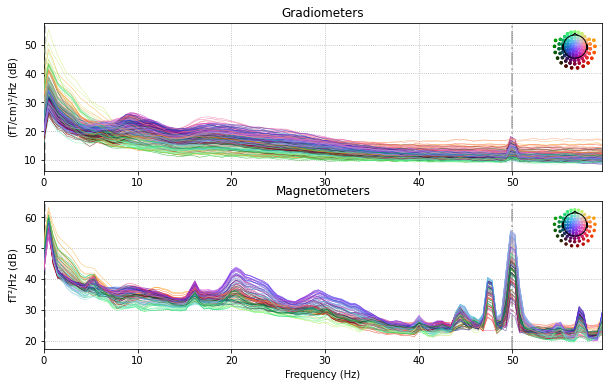

In [15]:
data1.plot_psd(fmax=60);

Note the 10 Hz alpha activity on the gradiometers as well as the 50 Hz line noise. The frequency of the line noise is 50 Hz in European countries including Russia whereas it is 60 in South Korea as well as South and North America. In Japan it can be either 50 or 60 Hz depending on the region.

**Question 3:** Why is the line-noise 50 Hz larger for the magnetometers than the gradiometers?

To view the raw data use

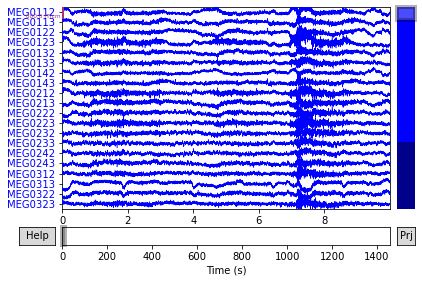

In [16]:
data1.pick(['meg']).plot(duration=10,title='Raw');

**Question 3:** Scroll through the data and identify the following artifacts (include figures in the response):

- Eye-blink
- A muscle contraction (characterized by high-frequency activity
- The cardiac artifact





## Preregistration and publication

Preregistration: report the sampling frequency and the properties of the anti-aliasing lowpass filter. Also report the peripheral data to be recorded (e.g. the EOG and ECG)

Publication, example:

"The ongoing MEG data were recored using the TRIUX$^{TM}$ system from MEGIN. The system has 102 magnetometers and 204 planer gradiometers. These are placed at 102 locations each having one magnetometers and a set of two orthogonal gradiometers. The  horizontal electrooculogram (hEOG) was acquired by placing two electrodes at respectively the canthus of the left and the right eye. The vertical electrooculogram (vEOG) was acquired from electodes placed above and below the left eye. The electrocardiogram (ECG) was acquired from electodes places on left and right colorbones. A ground electrode was placed at the partipants neck. The EOG and ECG data were acquired together with the MEG data. The gantry angle was 68 degrees. The data were sampled at 1000 Hz and stored for offline analysis. Prior to sampling the data were lowpass-filtered at 330 Hz (6th order Butterworth IIR filter) to attenuate aliasing artifacts. A 0.1 Hz highpassfilter (-3 Db corner frequency) was applied as well to attenuate drifts."  

## References
Smith, W.S. (1997) The Scientist and Engineer's Guide to Digital Signal Processing. California Technical Publishing. ISBN 0-9660176-3-3 [Online version](http://www.dspguide.com/)